In [76]:
# Muhammad Subhan
# 20I-0873
# CS - D
# Stat Modelling Assignment 1

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
az.style.use('arviz-darkgrid')

Normal Distributions


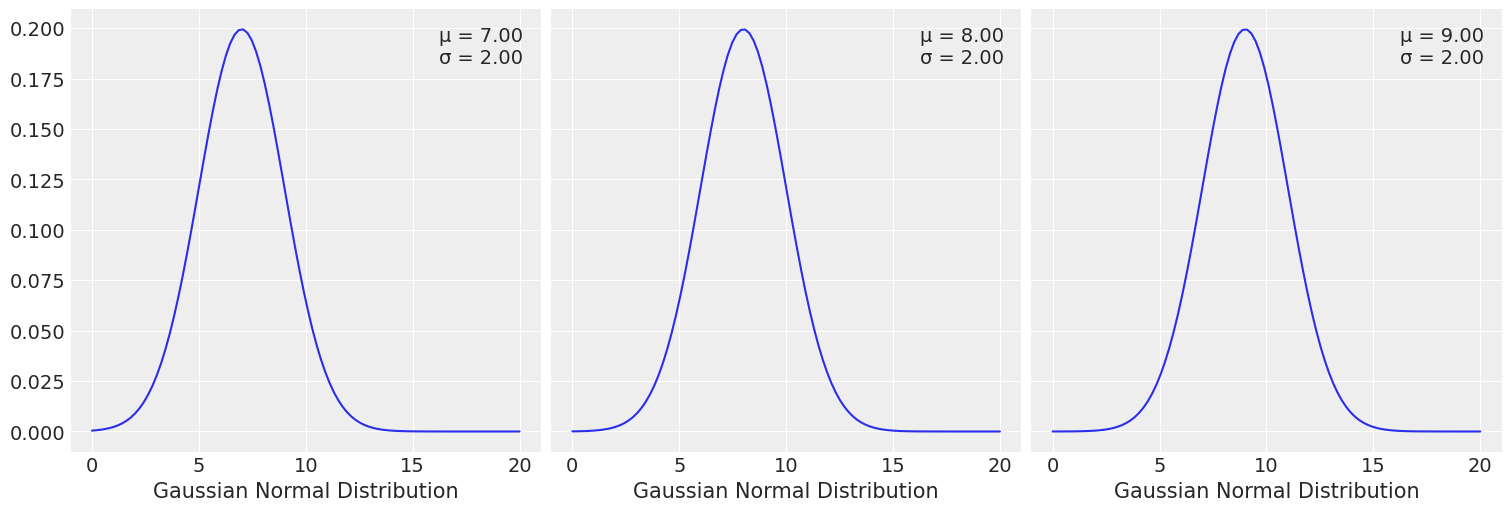

Beta Distributions


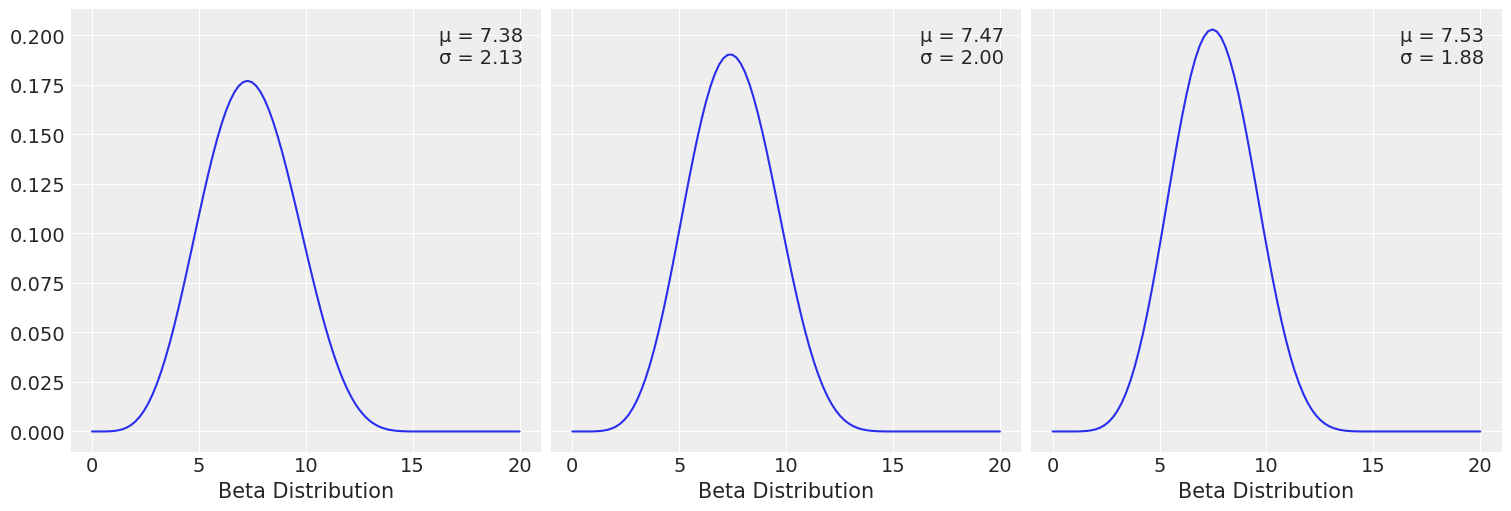

In [77]:
# Question 1

# Given Values choose mean such that distribution lies on positive side of line
mean = np.arange(7,10)
std = 2
# Generate Equally Spaced Data
x = np.linspace(0,20, 100)
# Make Subplots 
fig, ax = plt.subplots(1,len(mean), sharex=True, sharey=True, figsize=(15,5), constrained_layout=True)

print("Normal Distributions")
for i in range(len(mean)):
    # Make Gaussian Normal Distribution using given values
    d1 = stats.norm(loc=mean[i], scale=std)
    # Calculate pdf
    y1 = d1.pdf(x)
    # Plotting Commands 
    ax[i].plot(x, y1)
    ax[i].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mean[i], std), alpha=0)
    ax[i].legend(loc=1)
    ax[i].set_xlabel('Gaussian Normal Distribution')
plt.show()

print("Beta Distributions")

# Distribution 2
# Plot beta distributions using different values of α and β such that mean and std are as what expected

fig, ax2 = plt.subplots(1,3, sharex=True, sharey=True, figsize=(15,5), constrained_layout=True)
m = np.arange(3,20)
f = int(0)

for i in range(len(m)-1):
    betaPrior = stats.beta(m[i],m[i+1] , scale=16)
    mean, var = betaPrior.stats()
    var = var**0.5
    if var < 2.2 and var >1.8:
        ax2[f].plot(x,betaPrior.pdf(x))
        ax2[f].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mean, var), alpha=0)
        ax2[f].legend(loc=1)
        ax2[f].set_xlabel('Beta Distribution')
        f+=1

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


Probability atleast 1 seed will germinate:  0.9434782608695651
Equally Tailed Intervals: 	0.096 	0.527


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.283,0.116,0.089,0.5,0.003,0.002,1117.0,983.0,NaN


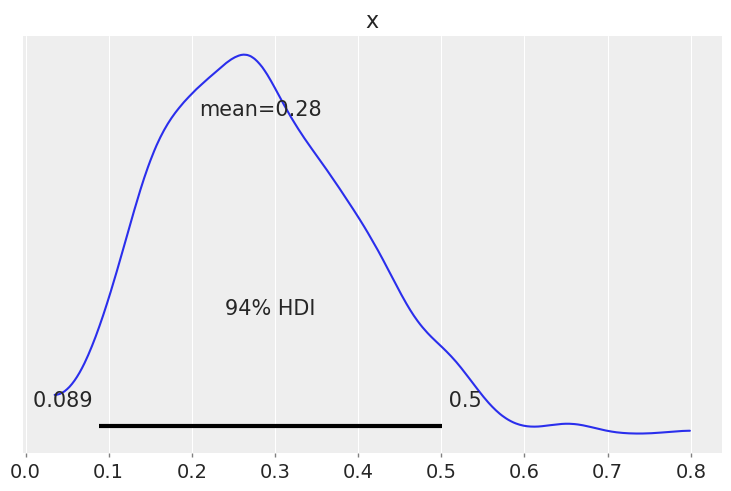

In [80]:
# Question 2

N = 12
y = 3
d = np.linspace(0,1,1000)
θ = 0.25
x = np.arange(0, 20)

# Beta Posterior
betaPosterior = stats.beta(1+y, 1+N-y)
# Beta Binomial Posterior
predictiveposterior = stats.betabinom(12, 1+y, 1+N-y)
# Pmf for Posterior
posteriorpmf = predictiveposterior.pmf(x)
# Comulative Probability for values greater than 1
comulative_probability = posteriorpmf[1:].sum()
# Print Probability
print("Probability atleast 1 seed will germinate: ", comulative_probability)

# Equally Tailed Intervals
equal_intervals = (betaPosterior.ppf(0.03), betaPosterior.ppf(0.97))
print(f"Equally Tailed Intervals: \t{equal_intervals[0]:.3f} ", end="\t")
print(f"{equal_intervals[1]:.3f}")


# Calculate highest density 94% posterior intervals.
np.random.seed(123)
betaposterior = stats.beta.rvs(1+y,1+N-y,size=1000)
# plot Interval
az.plot_posterior(betaposterior)
# Display Summary
az.summary(betaposterior)